In [1]:
import pandas as pd
import scanpy as sc
import numpy as np

/home/igarzonalva/.conda/envs/cell2cell/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/igarzonalva/.conda/envs/cell2cell/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/igarzonalva/.conda/envs/cell2cell/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/igarzonalva/.conda/envs/cell2cell/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/home/igarzonalva/.conda/envs/cell2cell/lib/python3.10/site-packages/anndata/utils.py:

In [2]:
adata_dir = '/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/LabelTransfer/adatas/full_adata_post_label_transfer.h5ad'


In [3]:
adata = sc.read_h5ad(adata_dir)

In [8]:
adata.obs_keys()

['sample',
 'n_genes_by_counts',
 'total_counts',
 'pct_counts_in_top_50_genes',
 'pct_counts_in_top_100_genes',
 'pct_counts_in_top_200_genes',
 'pct_counts_in_top_500_genes',
 'total_counts_mt',
 'pct_counts_mt',
 'complexity',
 'doublet_scores',
 'predicted_doublets',
 'n_genes',
 'n_counts',
 'celltypist_labels_Immune_All_High',
 'celltypist_scores_Immune_All_High',
 'celltypist_labels_Cells_Adult_Breast',
 'celltypist_scores_Cells_Adult_Breast',
 'batch',
 'subtype',
 'leiden',
 'celltypist_labels_Immune_All_High_highconf',
 'GenAnno',
 'GenAnnoV1',
 'GenAnnoV2',
 'celltypist_mapped',
 'GenAnnoHighConf',
 'cell_type',
 'predicted_labels',
 'GennAnno_ScAnvi',
 'LabelTransferAnno']

In [86]:
cell_types = adata.obs[['batch','LabelTransferAnno']]

In [87]:
cell_types

,batch,LabelTransferAnno
AAACCTGAGAAACCGC-1-PM0337-,PM0337-,Mac_IFN
AAACCTGAGACCCACC-1-PM0337-,PM0337-,RTM_IM
AAACCTGCACCTGGTG-1-PM0337-,PM0337-,Plasma cells
AAACCTGCACTAGTAC-1-PM0337-,PM0337-,Epithelial
AAACCTGCAGGCGATA-1-PM0337-,PM0337-,Epithelial
...,...,...
TTTGTCAAGTTAGGTA-1-MH0126-,MH0126-,T cells
TTTGTCACACGTGAGA-1-MH0126-,MH0126-,unknown
TTTGTCACATCGGAAG-1-MH0126-,MH0126-,Cycling cells
TTTGTCATCCCGACTT-1-MH0126-,MH0126-,T cells


In [88]:
cell_types.index = cell_types.index.set_names(['cell'])



In [89]:
cell_types

,batch,LabelTransferAnno
cell,,
AAACCTGAGAAACCGC-1-PM0337-,PM0337-,Mac_IFN
AAACCTGAGACCCACC-1-PM0337-,PM0337-,RTM_IM
AAACCTGCACCTGGTG-1-PM0337-,PM0337-,Plasma cells
AAACCTGCACTAGTAC-1-PM0337-,PM0337-,Epithelial
AAACCTGCAGGCGATA-1-PM0337-,PM0337-,Epithelial
...,...,...
TTTGTCAAGTTAGGTA-1-MH0126-,MH0126-,T cells
TTTGTCACACGTGAGA-1-MH0126-,MH0126-,unknown
TTTGTCACATCGGAAG-1-MH0126-,MH0126-,Cycling cells


In [90]:
cell_types = cell_types.reset_index().rename(columns={cell_types.index.name:'cell'})

In [91]:
cell_types

,cell,batch,LabelTransferAnno
0,AAACCTGAGAAACCGC-1-PM0337-,PM0337-,Mac_IFN
1,AAACCTGAGACCCACC-1-PM0337-,PM0337-,RTM_IM
2,AAACCTGCACCTGGTG-1-PM0337-,PM0337-,Plasma cells
3,AAACCTGCACTAGTAC-1-PM0337-,PM0337-,Epithelial
4,AAACCTGCAGGCGATA-1-PM0337-,PM0337-,Epithelial
...,...,...,...
152314,TTTGTCAAGTTAGGTA-1-MH0126-,MH0126-,T cells
152315,TTTGTCACACGTGAGA-1-MH0126-,MH0126-,unknown
152316,TTTGTCACATCGGAAG-1-MH0126-,MH0126-,Cycling cells
152317,TTTGTCATCCCGACTT-1-MH0126-,MH0126-,T cells


In [92]:
cell_prop = cell_types.groupby(['batch','LabelTransferAnno'])['cell'].count() / cell_types.groupby(['batch'])['cell'].count()

/tmp/ipykernel_75741/1681568779.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_prop = cell_types.groupby(['batch','LabelTransferAnno'])['cell'].count() / cell_types.groupby(['batch'])['cell'].count()


In [93]:
cell_prop = cell_prop.reset_index()

In [94]:
cell_prop['LabelTransferAnno'] = pd.Categorical(cell_prop['LabelTransferAnno'], categories=sorted(cell_prop['LabelTransferAnno'].unique()), ordered=True)


In [96]:
cell_prop.groupby(['batch'])['cell'].sum()

/tmp/ipykernel_75741/788148086.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_prop.groupby(['batch'])['cell'].sum()


batch
PM0337-        1.0
B1-Tum0554-    1.0
MH0151-        1.0
MH0069-        1.0
MH0114-T2-     1.0
MH0176-        1.0
MH0114-T3-     1.0
B1-MH4031-     1.0
MH0001-        1.0
PM0360-        1.0
SH0106-        1.0
MH0135-        1.0
MH0042-        1.0
MH0125-        1.0
B1-MH0131-     1.0
AH0319-        1.0
B1-MH0177-     1.0
MH0040-LN-     1.0
MH0040-        1.0
MH0032-        1.0
MH0043-T-      1.0
MH0031-        1.0
MH0161-        1.0
MH0025-        1.0
MH0163-        1.0
AH0308-        1.0
MH0167-T-      1.0
MH0126-        1.0
Name: cell, dtype: float64

In [97]:
pivot_df = cell_prop.pivot(index(['batch'], columns='LabelTransferAnno', values='cell').fillna(0)

SyntaxError: incomplete input (257246206.py, line 1)

In [98]:
pivot_df

LabelTransferAnno,B cells,Cycling cells,Endothelial,Epithelial,IDO_CAF,Mac_AgPres,Mac_Angio,Mac_Hypo,Mac_IFN,Mac_LA,...,cDC_CXCL8,cDC_LAMP3,dCAF,hsp_tpCAF,iCAF,mCAF,pDC,tpCAF,unknown,vCAF
batch,,,,,,,,,,,,,,,,,,,,,
PM0337-,0.010804,0.234131,0.006630,0.260896,0.003069,0.005034,0.004665,0.010804,0.024923,0.002701,...,0.001473,0.001842,0.000491,0.000491,0.000000,0.016697,0.001842,0.002455,0.025905,0.000246
B1-Tum0554-,0.117108,0.155341,0.014297,0.158554,0.012530,0.008353,0.011727,0.014137,0.005622,0.002088,...,0.008353,0.002570,0.002731,0.007068,0.020402,0.004337,0.015422,0.006426,0.042088,0.001606
MH0151-,0.024706,0.015796,0.039287,0.281490,0.002430,0.030782,0.000000,0.000000,0.000405,0.002835,...,0.001215,0.001215,0.000000,0.004050,0.111381,0.046578,0.002430,0.007290,0.023086,0.012151
MH0069-,0.008242,0.060440,0.063187,0.357143,0.008242,0.013736,0.016484,0.002747,0.000000,0.008242,...,0.000000,0.000000,0.002747,0.000000,0.027473,0.024725,0.013736,0.002747,0.024725,0.008242
MH0114-T2-,0.019620,0.034810,0.012658,0.101266,0.001266,0.029114,0.005696,0.008861,0.003165,0.010759,...,0.000633,0.003797,0.000000,0.000000,0.000000,0.035443,0.003797,0.001266,0.018354,0.009494
MH0176-,0.081450,0.069198,0.026614,0.407151,0.007532,0.011650,0.000603,0.002109,0.003314,0.003917,...,0.001607,0.002812,0.000803,0.000803,0.006528,0.030029,0.005825,0.003214,0.024003,0.004720
MH0114-T3-,0.004444,0.043137,0.019477,0.791111,0.001307,0.007974,0.000131,0.000000,0.000000,0.001961,...,0.001046,0.000000,0.000261,0.001046,0.006275,0.009150,0.000131,0.003007,0.008366,0.047582
B1-MH4031-,0.000765,0.312548,0.006886,0.663925,0.000383,0.000191,0.001148,0.000383,0.001148,0.000956,...,0.000191,0.000000,0.000000,0.000000,0.000765,0.000574,0.000000,0.001339,0.002678,0.000000
MH0001-,0.001141,0.250228,0.002965,0.658987,0.000228,0.000228,0.000000,0.000456,0.000000,0.006843,...,0.000228,0.000000,0.002053,0.000000,0.000000,0.012318,0.000000,0.008440,0.009124,0.000912


In [99]:
pivot_df.shape

(28, 39)

In [ ]:
import matplotlib.pyplot as plt


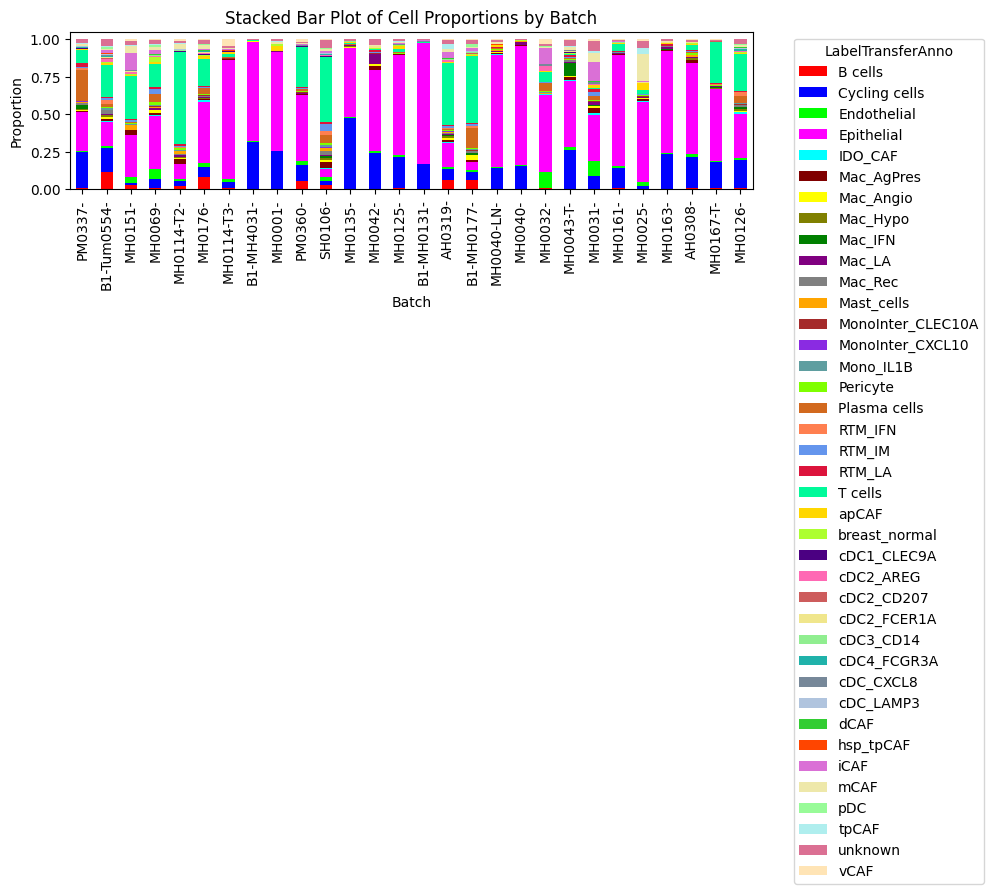

In [100]:
colors = [
    "#FF0000", "#0000FF", "#00FF00", "#FF00FF", "#00FFFF", "#800000","#FFFF00",
    "#808000", "#008000", "#800080", "#808080", "#FFA500", "#A52A2A", "#8A2BE2",
    "#5F9EA0", "#7FFF00", "#D2691E", "#FF7F50", "#6495ED", "#DC143C", "#00FA9A",
    "#FFD700", "#ADFF2F", "#4B0082", "#FF69B4", "#CD5C5C", "#F0E68C", "#90EE90",
    "#20B2AA", "#778899", "#B0C4DE", "#32CD32", "#FF4500", "#DA70D6", "#EEE8AA",
    "#98FB98", "#AFEEEE", "#DB7093", "#FFE4B5"
]
pivot_df.plot(kind='bar', color=colors[:pivot_df.shape[1]],stacked=True, figsize=(10, 6))
# Customize the plot
plt.title('Stacked Bar Plot of Cell Proportions by Batch')
plt.ylabel('Proportion')
plt.xlabel('Batch')
plt.legend(title='LabelTransferAnno', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()